In [4]:
os.getcwd()

'/Users/ibrahimbutt/Hamza/aps360/Project'

First we make and save the 3 second audio snippets

In [2]:
import pydub
from pydub.utils import make_chunks

def create_audiosnips_folders(root, sec = 3, fullWavFolder = 'wav files'):
    
    genreNames = [f.name for f in os.scandir(Path(root, fullWavFolder)) if f.is_dir()]
    
    snipDir = Path(root, f'{sec}sec_snips')
    
    #
    try:
        os.rmdir(snipDir)
    except OSError as error:
        pass
    
    try:  
        os.mkdir(snipDir)  
    except OSError as error:  
        pass 
    
    
    for genreName in genreNames:
            
        snipGenrePath = Path(snipDir, genreName)
        
        try:  
            os.mkdir(snipGenrePath)  
        except OSError as error:  
            pass 
        
        fullGenrePath = Path(root, fullWavFolder, genreName)
        

        # :-4 is to remove .wav from the name
        songnames = [f.name[:-4] for f in os.scandir(fullGenrePath) if (f.is_file() and str(f.name) != '.DS_Store')]
        
        for songname in songnames:
            
            fullSongPath = Path(fullGenrePath, songname+'.wav')
            
            sound = pydub.AudioSegment.from_file(fullSongPath, 'wav')
            sound = sound.set_channels(1) # exporting as mono
                        
            chunk_length_ms = sec*1000 # pydub calculates in millisec
            chunks = make_chunks(sound, chunk_length_ms) #Make chunks of one sec
            
            snip = 0
            
            for i, chunk in enumerate(chunks): 
                snipFileName = f'snip{snip}_{sec}s{songname}.wav'
                
                chunk.export(Path(snipGenrePath, snipFileName), format='wav')
                
                snip+=1
            
        

In [78]:
create_audiosnips_folders(os.getcwd(), sec = 3, fullWavFolder = 'wav files')

In [3]:
def create_audiosnips(songPath, output, sec = 3):
    '''
    Will place all audio files in output folder
    
    songPath and output should be a path
    sec is seconds of audio snipper
    '''
    try:
        os.mkdir(output)
    except OSError as error:
        pass
    
    sound = pydub.AudioSegment.from_file(songPath, 'wav')
    sound = sound.set_channels(1)
    
    chunk_length_ms = sec*1000 # pydub calculates in millisec
    chunks = make_chunks(sound, chunk_length_ms) #Make chunks of one sec

    snip = 0

    for i, chunk in enumerate(chunks): 
        snipFileName = f'snip{snip}_{sec}s_{songname}.wav'

        chunk.export(Path(snipGenrePath, snipFileName), format='wav')

        snip+=1


We now create the spectograms from the audio snippets

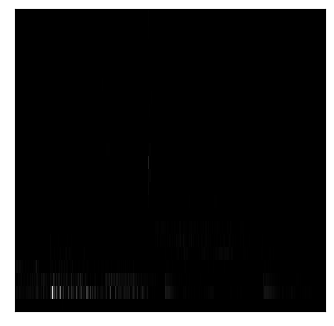

In [188]:
snipFolder = Path(os.getcwd(), '3sec_snips')

altPath = Path(snipFolder, 'alternative')




mypath = Path(altPath, "snip19_3sSHAED - Trampoline (Official Video).wav")



create_spectogram(mypath, Path(os.getcwd(),'eg.png'), resolution = 400)



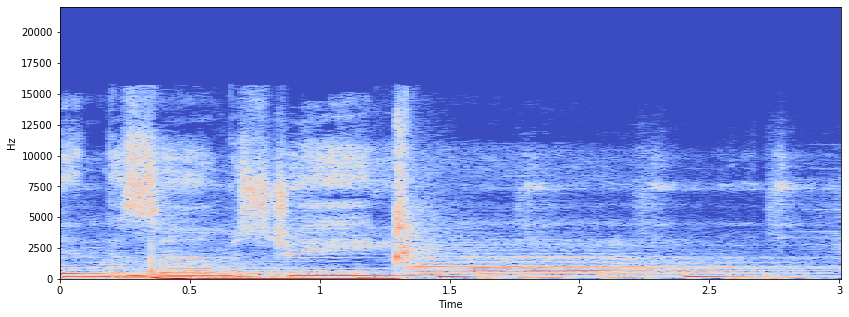

In [241]:
#for loading and visualizing audio files
import librosa
import librosa.display

x, sr = librosa.load(mypath, sr=44100)

X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.show()

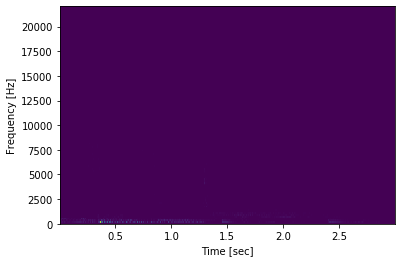

In [190]:
sample_rate, data = sp.io.wavfile.read(mypath)

# Spectrogram of .wav file
sample_freq, segment_time, spec_data = signal.spectrogram(data, sample_rate) 

plt.pcolormesh(segment_time, sample_freq, spec_data )
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show() 

SPAM shift+enter from here

In [5]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import signal
from scipy.io import wavfile

import os
from pathlib import Path

In [6]:
import matplotlib.cm as cm

#for loading and visualizing audio files
import librosa
import librosa.display


def create_spectogram(audioSnippet, output):
    '''
    audioSnippet is the path to .wav audio file you wish to
    genereate an audio clip from
    
    output is the path to save the spectogram image

    should generate a 224x224 image on 3s audioSnippets
    '''

    x, sr = librosa.load(audioSnippet, sr=44100)

    X = librosa.stft(x)
    Xdb = librosa.amplitude_to_db(abs(X))
    my_dpi=1
    plt.figure(figsize=(290, 297), dpi = my_dpi)
    librosa.display.specshow(Xdb, sr=sr, cmap='gray_r')
    plt.savefig(output, bbox_inches='tight', pad_inches=0.0)
    plt.close()

    

In [7]:
def create_spectogram_folders(snippetFolder, outputDir, imageType = 'jpeg'):
    try:
        os.mkdir(outputDir)
    except OSError as error:
        pass
    
    genreNames = [f.name for f in os.scandir(snippetFolder) if f.is_dir()]
    
    
    for genreName in genreNames:
        i = 0
        genreDir = Path(outputDir, genreName)
        try:
            os.mkdir(genreDir)
        except OSError as error:
            pass
        
        
        alreadyDoneCount = len([f.name for f in os.scandir(genreDir) if f.is_file()])
        
        srcDir = Path(snippetFolder, genreName)
        
        fileNames = [f.name for f in os.scandir(srcDir) if f.is_file()]
        for audioFile in fileNames:
            if(i<alreadyDoneCount):
                i+=1
                continue
                
            srcPath = Path(srcDir, audioFile)

            outputF = f'{audioFile[:-4]}.{imageType}'

            outputPath = Path(genreDir, outputF)
            create_spectogram(srcPath, outputPath)
    

In [8]:
snippetDir = Path(os.getcwd(), '3sec_snips')
outputDir = Path(os.getcwd(), 'Spectograms')

create_spectogram_folders(snippetDir, outputDir)